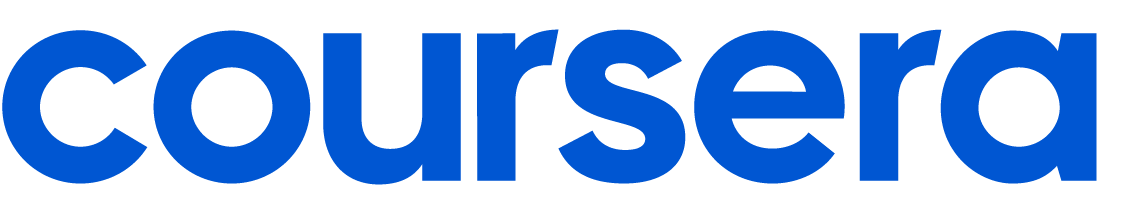

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Import any other packages you may want to use
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, plot_roc_curve, accuracy_score, make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn import set_config

In [7]:
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from scipy import stats

In [8]:
import tensorflow as tf

In [50]:
set_config(display='diagram')

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [10]:
train_df = pd.read_csv("train.csv")
train_df.shape

/tmp/ipykernel_118303/3935830336.py:1: DtypeWarning: Columns (6,7,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


(413955, 37)

In [11]:
test_df = pd.read_csv("test.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [12]:
# your code here (optional)
train_df.head()

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,--rKikbGEeyQHQqIvaM5IQ,2022-05-04,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,2321.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,73.783333,0.000000,68.0,0.0,20.0
1,-0XGzEq2EeyimBISGRuNeQ,2021-11-30,0.0,Q0Fc_Yl0EeqdTApgQ4tM7Q,6.0,Data Science,True,False,612.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,0.850000,0.000000,7.0,2.0,0.0
2,-1P9kOb6EeuRugq1Liq62w,2021-08-13,0.0,9kmimrDIEeqxzQqieMm42w,6.0,Business,True,True,27.0,Australia and New Zealand,...,0.0,1.0,12.0,2.0,False,1.833333,2.983333,2.0,1.0,18.0
3,-2ifTJZbEeuIuRKpAhovaw,2021-08-03,1.0,7lHCSlFIEeeffRIHljDI_g,5.0,Information Technology,True,True,120.0,United States,...,0.0,2.0,83.0,9.0,False,18.450000,7.100000,18.0,4.0,3.0
4,-5YKZbchEeufeAq6C_fAOw,2021-06-04,0.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,1228.0,India,...,1.0,1.0,61.0,4.0,False,29.566667,15.250000,18.0,8.0,1.0


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

In [14]:
train_df.isna().sum().sort_index()

cnt_courses_in_specialization                       1
cnt_days_active_before_payment_period               1
cnt_days_active_during_payment_period               1
cnt_days_since_last_activity                        1
cnt_enrollments_active_before_payment_period        1
cnt_enrollments_active_during_payment_period        1
cnt_enrollments_completed_before_payment_period     1
cnt_enrollments_completed_during_payment_period     1
cnt_enrollments_started_before_payment_period       1
cnt_enrollments_started_during_payment_period       1
cnt_graded_items_completed_before_payment_period    1
cnt_graded_items_completed_during_payment_period    1
cnt_items_completed_before_payment_period           1
cnt_items_completed_during_payment_period           1
days_since_last_payment                             1
days_til_next_payment_due                           1
is_active_capstone_during_pay_period                1
is_gateway_certificate                              1
is_professional_certificate 

In [15]:
## since the NaN values in the train set is very samll compared to the entire data.
## I will choose to drop them.
train_df.dropna(inplace=True)

## check that the data has no NaN values
assert train_df.isna().sum().sum() == 0

In [16]:
assert test_df.isna().sum().sum() == 0

In [17]:
## get the columns that has object data type
object_type_columns = train_df.select_dtypes("object").columns
object_type_columns

Index(['subscription_id', 'observation_dt', 'specialization_id',
       'specialization_domain', 'is_professional_certificate',
       'is_gateway_certificate', 'learner_country_group', 'learner_gender',
       'is_subscription_started_with_free_trial',
       'is_active_capstone_during_pay_period'],
      dtype='object')

In [18]:
train_df[object_type_columns].sample()

,subscription_id,observation_dt,specialization_id,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_country_group,learner_gender,is_subscription_started_with_free_trial,is_active_capstone_during_pay_period
309514,O0XeGWFOEeuouwqtljuFNw,2021-03-25,9FcEl2x7EeeiKQ48uoMEhg,Health,False,False,Eastern Europe,male,True,False


In [19]:
## There is something wrong with the types in in these columns
## the columns ..._id : has the right data type
## the columns is_... : has wrong data type should be <boolean>
## the observation_dt : should have a datetime column type

## convert is_... columns to boolean datatype
boolean_type_columns = list(filter(lambda x: x.startswith("is_"), object_type_columns))
train_df[boolean_type_columns] = train_df[boolean_type_columns].astype(np.bool_)

## convert the observation_dt column to datetime
train_df["observation_dt"] = pd.to_datetime(train_df["observation_dt"])

In [20]:
## apply the same above cleaning to the test dataset
test_df[boolean_type_columns] = test_df[boolean_type_columns].astype(np.bool_)

test_df["observation_dt"] = pd.to_datetime(test_df["observation_dt"])

In [21]:
## Now for the other columns (country_group, gender) these columns
## will convert to numeric columns using OneHotEncoding (sklearn)
## TODO: convert (specialization_id, learner_country_group, learner_gender) -> OneHotEncoding

In [22]:
train_df.sample(2)

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
282558,Sn-oyShpEey-kQqCHXpg7w,2021-10-30,1.0,dwzq23ZLEei12goo904QNg,10.0,Data Science,True,True,1805.0,Eastern Europe,...,0.0,0.0,0.0,0.0,False,3.600000,0.0,5.0,0.0,16.0
350323,yUi-0QUWEeyakQqH-Zt6pQ,2022-03-19,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,207.0,United States,...,0.0,0.0,0.0,0.0,False,5.533333,0.0,4.0,0.0,185.0


In [23]:
## EDA
## Now due to the data is contain many columns (aka variables) performing EDA will be quite annoying
## So, I will divied the work in this process into categories depending on the columns group as.
## we can see all the columns have a prefix donating it group like (learner -> all info about the learner),
## is_ (all the boolean values).

## So, I will start with each group alone and this try to combine thing at the end.

In [24]:
learner_columns = list(filter(lambda x: x.startswith("learner_"), train_df.columns))
learner_columns

['learner_days_since_registration',
 'learner_country_group',
 'learner_gender',
 'learner_cnt_other_courses_active',
 'learner_cnt_other_courses_paid_active',
 'learner_cnt_other_courses_items_completed',
 'learner_cnt_other_courses_paid_items_completed',
 'learner_cnt_other_transactions_past',
 'learner_other_revenue']

In [25]:
train_df[learner_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
learner_days_since_registration,413953.0,745.107128,950.801071,0.0,71.0,279.0,1109.0,3857.00
learner_cnt_other_courses_active,413953.0,5.421739,13.819050,0.0,0.0,1.0,4.0,604.00
learner_cnt_other_courses_paid_active,413953.0,1.281520,3.743266,0.0,0.0,0.0,1.0,215.00
learner_cnt_other_courses_items_completed,413953.0,114.289243,303.469990,0.0,0.0,4.0,90.0,19439.00
learner_cnt_other_courses_paid_items_completed,413953.0,62.943660,194.270090,0.0,0.0,0.0,13.0,6912.00
learner_cnt_other_transactions_past,413953.0,1.966615,6.517248,0.0,0.0,0.0,1.0,474.00
learner_other_revenue,413953.0,101.281377,353.680276,0.0,0.0,0.0,49.0,24069.92


In [26]:
## How many gender values?
train_df["learner_gender"].value_counts(normalize=True)

## We can see that the male gender is quit dominated in the data 
## (this migh cause some bias later)

male       0.438820
unknown    0.288943
female     0.269560
other      0.002677
Name: learner_gender, dtype: float64

Skew: 1.4040


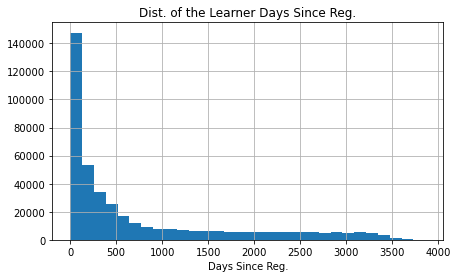

In [27]:
## Dist. of the days scince registeration
train_df["learner_days_since_registration"].hist(bins=30, figsize=(7, 4))
plt.xlabel("Days Since Reg.");
plt.title("Dist. of the Learner Days Since Reg.");

## We can clearly see how the data is sklewed (very skew) to the right?
print("Skew: {:.4f}".format(train_df["learner_days_since_registration"].skew()))

## We will transform this data have a normal dist using
## log, or boxcox depending on the results, as a sklearn FunctionTransformer

learner_cnt_other_courses_active                   7.572863
learner_cnt_other_courses_paid_active              9.354677
learner_cnt_other_courses_items_completed          8.390215
learner_cnt_other_courses_paid_items_completed     6.462447
learner_cnt_other_transactions_past               12.035487
dtype: float64


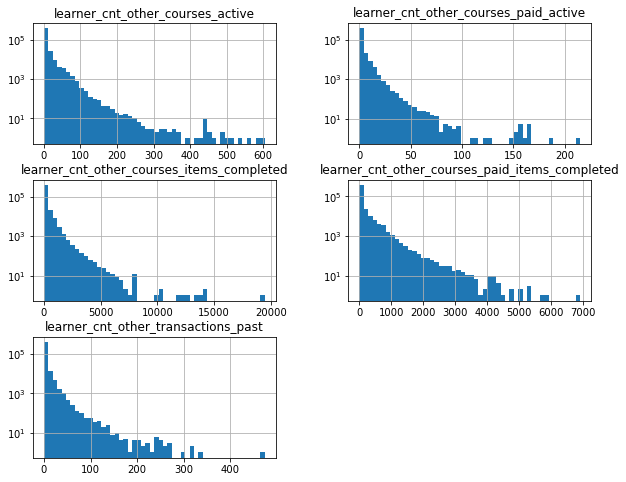

In [28]:
axes = (
    train_df[
        ['learner_cnt_other_courses_active',
         'learner_cnt_other_courses_paid_active',
         'learner_cnt_other_courses_items_completed',
         'learner_cnt_other_courses_paid_items_completed',
         'learner_cnt_other_transactions_past']
    ].hist(figsize=(10, 8), bins=50)
)
for row in axes:
    for ax in row:
        ax.set_yscale("log");

## As we can see thses columns are extreamly skewed to the right
## even after a log scale. it still very skews

print(train_df[
        ['learner_cnt_other_courses_active',
         'learner_cnt_other_courses_paid_active',
         'learner_cnt_other_courses_items_completed',
         'learner_cnt_other_courses_paid_items_completed',
         'learner_cnt_other_transactions_past']].skew()
)

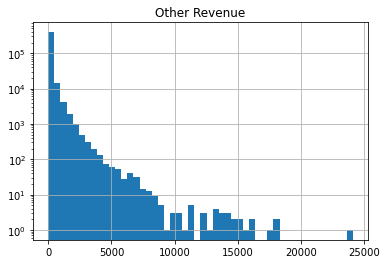

In [29]:
train_df["learner_other_revenue"].hist(bins=50)
plt.title("Other Revenue")
plt.yscale("log");

In [30]:
## Moving foreward with other group which is cnt_ group
cnt_columns = list(filter(lambda x: x.startswith("cnt_"), train_df.columns))
cnt_columns

['cnt_courses_in_specialization',
 'cnt_enrollments_started_before_payment_period',
 'cnt_enrollments_completed_before_payment_period',
 'cnt_enrollments_active_before_payment_period',
 'cnt_items_completed_before_payment_period',
 'cnt_graded_items_completed_before_payment_period',
 'cnt_enrollments_started_during_payment_period',
 'cnt_enrollments_completed_during_payment_period',
 'cnt_enrollments_active_during_payment_period',
 'cnt_items_completed_during_payment_period',
 'cnt_graded_items_completed_during_payment_period',
 'cnt_days_active_before_payment_period',
 'cnt_days_active_during_payment_period',
 'cnt_days_since_last_activity']

In [31]:
train_df[cnt_columns].sample(3)

,cnt_courses_in_specialization,cnt_enrollments_started_before_payment_period,cnt_enrollments_completed_before_payment_period,cnt_enrollments_active_before_payment_period,cnt_items_completed_before_payment_period,cnt_graded_items_completed_before_payment_period,cnt_enrollments_started_during_payment_period,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
345226,10.0,10.0,9.0,10.0,473.0,50.0,0.0,0.0,1.0,3.0,0.0,39.0,3.0,0.0
149573,6.0,2.0,1.0,2.0,35.0,9.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,79.0
241902,6.0,3.0,2.0,3.0,109.0,13.0,0.0,0.0,1.0,27.0,2.0,10.0,7.0,2.0


In [32]:
train_df[cnt_columns].describe().transpose().drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
cnt_courses_in_specialization,5.926644,1.759556,3.0,5.0,6.0,7.0,13.0
cnt_enrollments_started_before_payment_period,1.874283,1.579343,0.0,1.0,1.0,2.0,13.0
cnt_enrollments_completed_before_payment_period,0.768295,1.401036,0.0,0.0,0.0,1.0,12.0
cnt_enrollments_active_before_payment_period,1.620220,1.548553,0.0,1.0,1.0,2.0,13.0
cnt_items_completed_before_payment_period,89.319193,131.895267,0.0,7.0,37.0,112.0,1111.0
cnt_graded_items_completed_before_payment_period,6.571811,10.675660,0.0,0.0,2.0,8.0,182.0
cnt_enrollments_started_during_payment_period,0.285387,0.720925,0.0,0.0,0.0,0.0,13.0
cnt_enrollments_completed_during_payment_period,0.235051,0.655435,0.0,0.0,0.0,0.0,10.0
cnt_enrollments_active_during_payment_period,0.681227,0.949701,0.0,0.0,0.0,1.0,11.0
cnt_items_completed_during_payment_period,21.015077,50.313255,0.0,0.0,0.0,20.0,1043.0


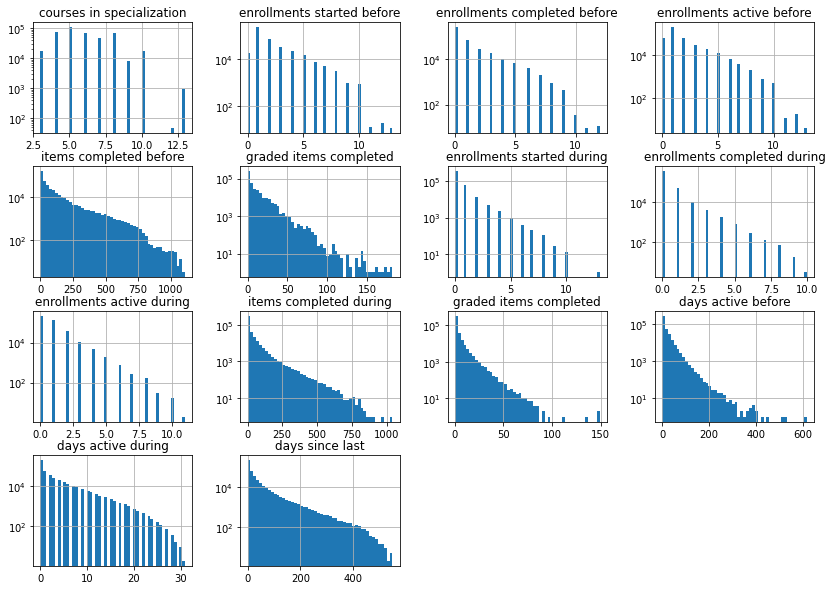

In [33]:
axes = train_df[cnt_columns].hist(figsize=(14, 10), bins=50);

for row in axes:
    for ax in row:
        ax.set_yscale("log");
        title = ax.get_title()
        ax.set_title(" ".join(title.split("_")[1:4]))

## As also seen here that data is very skewed and we will try.
## to transform it using the method mentioned above

In [34]:
## Moving foreward with the Specialization columns
specialization_columns = list(filter(lambda x: x.startswith("specialization_"), train_df.columns))
specialization_columns

['specialization_id', 'specialization_domain']

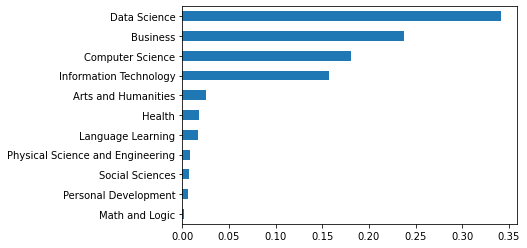

In [35]:
(
    train_df["specialization_domain"]
    .value_counts(normalize=True)
    .sort_values(ascending=True)
).plot.barh();

## We can clearly see that the data science domain is quit dominand in the dataset.

Text(0, 0.5, 'Proportion')

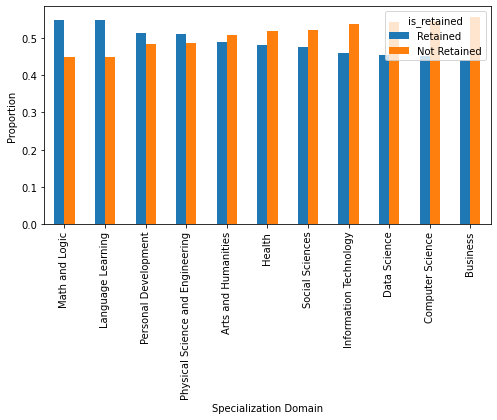

In [36]:
## How Specialiation Domain is related to the Retain Outcome.
(
    train_df.groupby("specialization_domain")["is_retained"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0.0: "Retained", 1: "Not Retained"})
    .sort_values("Not Retained", ascending=True)
    
).plot.bar(figsize=(8, 4));
plt.xlabel("Specialization Domain");
plt.ylabel("Proportion")

## We can see the all the Domains have rouphly the same Retain Rate.

<AxesSubplot:>

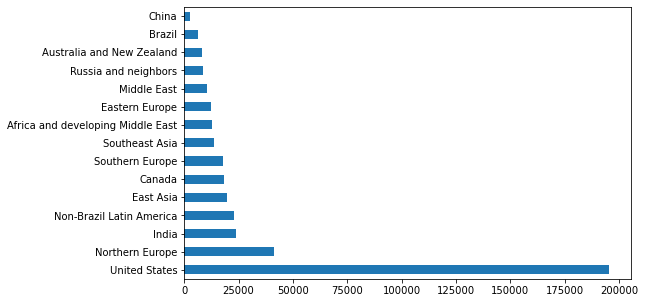

In [37]:
train_df["learner_country_group"].value_counts().plot.barh(figsize=(8, 5))

<AxesSubplot:>

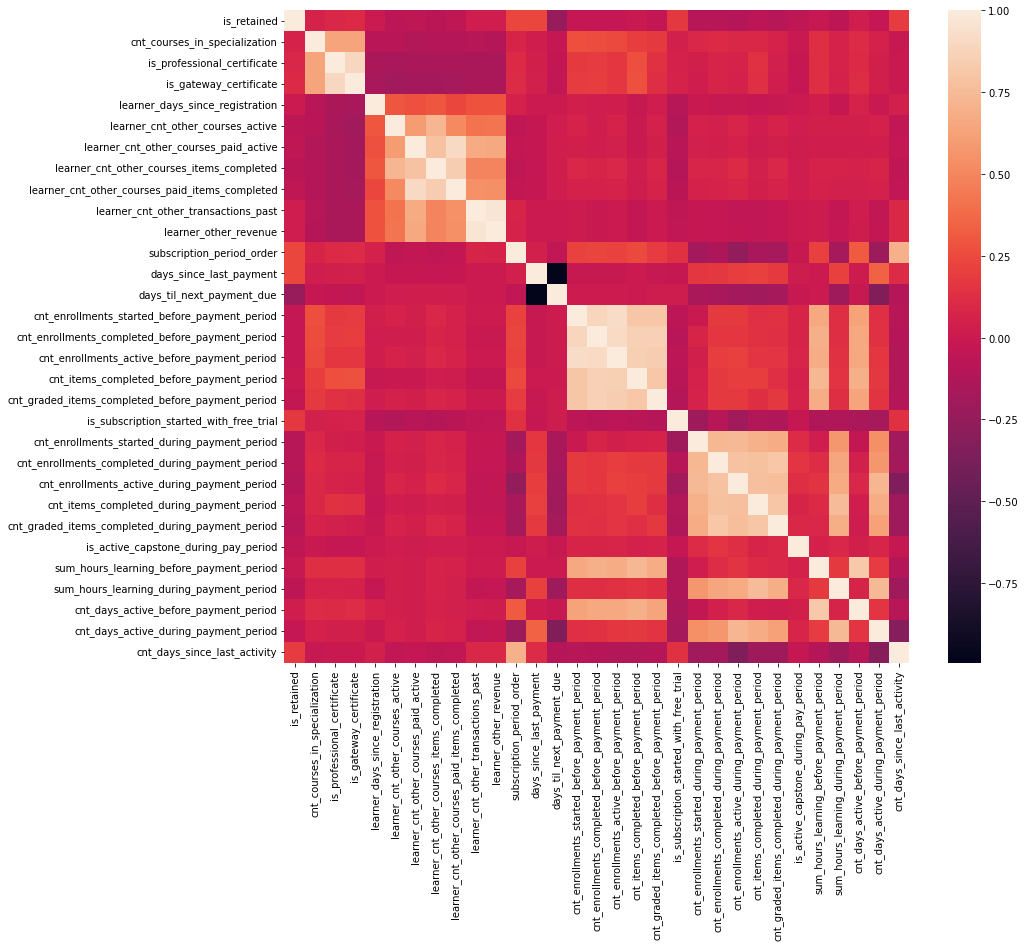

In [38]:
## Not lets look at how each column is correlated with each other
corr = train_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr)

In [39]:
## Now, enough performing EDA and let's start doing some ML work
## Since, The Data is quit large to do work very fast I will chose just a sample with 10,000 entries to test with
## splitted into train, and val as 80%, 20%.
## this sample will be just for testing things out and performing things fast.
## and at the end I will will perform the same operations on the entire dataset.

In [40]:
SAMPLE_SIZE = 10_000
RANDOM_STATE = 42

sample_df = train_df.sample(SAMPLE_SIZE, random_state=RANDOM_STATE)
sample_df.shape

(10000, 37)

In [41]:
## What We Need to Do is this:
#  - Transform object columns to OneHotVectors using OneHotEncoder
#  - Transform The Highly Skewed Data using log, or boxcox
#  - Standarize the Data using StandardScaler
#  - Fit Every Thing into a Pipeline for faster Testing

In [42]:
def log_transformer(X, small_value=1e-3, mult_value=1):
    return np.log((X + small_value) * mult_value)

def sqrt_transformer(X):
    X = X + np.abs(np.min(X))
    return np.sqrt(X)

def boxcox_transformer(X):
    X = X + np.abs(np.min(X))+1e-3
    columns = X.columns
    new_X = pd.DataFrame({col: stats.boxcox(X[col])[0] for col in columns})
    return new_X


In [43]:
to_onehot_columns = [
    "specialization_domain",
    "learner_country_group",
    "learner_gender"
]

to_log_columns = [
    'learner_cnt_other_courses_active',
    'learner_cnt_other_courses_paid_active',
    'learner_cnt_other_courses_items_completed',
    'learner_cnt_other_courses_paid_items_completed',
    'learner_cnt_other_transactions_past',
    'subscription_period_order'
]

to_boxcox_columns = [
    'cnt_courses_in_specialization',
    'cnt_enrollments_started_before_payment_period',
    'cnt_enrollments_completed_before_payment_period',
    'cnt_enrollments_active_before_payment_period',
    'cnt_items_completed_before_payment_period',
    'cnt_graded_items_completed_before_payment_period',
    'cnt_enrollments_started_during_payment_period',
    'cnt_enrollments_completed_during_payment_period',
    'cnt_enrollments_active_during_payment_period',
    'cnt_items_completed_during_payment_period',
    'cnt_graded_items_completed_during_payment_period',
    'cnt_days_active_before_payment_period',
    'cnt_days_active_during_payment_period',
    'cnt_days_since_last_activity',
    'sum_hours_learning_before_payment_period',
    'sum_hours_learning_during_payment_period',
]

to_sqrt_columns = [
    'days_since_last_payment',
    'days_til_next_payment_due'
]

feature_columns = to_onehot_columns + to_log_columns + to_boxcox_columns + to_sqrt_columns + [
    'is_professional_certificate',
    'is_gateway_certificate',
    'is_subscription_started_with_free_trial',
    'is_active_capstone_during_pay_period'
]

target_column = 'is_retained'


In [51]:
transformers = ColumnTransformer([
    ("onehot_trf", OneHotEncoder(), to_onehot_columns),
    ("log_trf", FunctionTransformer(log_transformer), to_log_columns),
    ("boxcox_trf", FunctionTransformer(boxcox_transformer), to_boxcox_columns),
    ("sqrt_trf", FunctionTransformer(sqrt_transformer), to_sqrt_columns)
])

transformers

ColumnTransformer(transformers=[('onehot_trf', OneHotEncoder(),
                                 ['specialization_domain',
                                  'learner_country_group', 'learner_gender']),
                                ('log_trf',
                                 FunctionTransformer(func=<function log_transformer at 0x7f7ef42181f0>),
                                 ['learner_cnt_other_courses_active',
                                  'learner_cnt_other_courses_paid_active',
                                  'learner_cnt_other_courses_items_completed',
                                  'learner_cnt_other_co...
                                  'cnt_graded_items_completed_during_payment_period',
                                  'cnt_days_active_before_payment_period',
                                  'cnt_days_active_during_payment_period',
                                  'cnt_days_since_last_activity',
                                  'sum_hours_learning_before_payment_period',
                                  'sum_hours_learning_during_payment_period']),
                                ('sqrt_trf',
                                 FunctionTransformer(func=<function sqrt_transformer at 0x7f7ef4218040>),
                                 ['days_since_last_payment',
                                  'days_til_next_payment_due'])])

In [46]:
## Remeber we only using the sample_df here just for acc. things 
target = sample_df[target_column]
features = sample_df[feature_columns]

features.shape, target.shape

((10000, 31), (10000,))

In [47]:
## lets split the data into train, and valid data
VALID_SIZE = 0.2
RANDOM_STATE = 42

x_train, x_valid, y_train, y_valid = train_test_split(features, target,
                                                     test_size=VALID_SIZE, random_state=RANDOM_STATE)

x_train.shape, x_valid.shape

((8000, 31), (2000, 31))

In [52]:
pipe = Pipeline([
    ("transformer", transformers),
    ("scaler", MinMaxScaler()),
    ("randomforest", RandomForestClassifier()),
])

pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot_trf', OneHotEncoder(),
                                                  ['specialization_domain',
                                                   'learner_country_group',
                                                   'learner_gender']),
                                                 ('log_trf',
                                                  FunctionTransformer(func=<function log_transformer at 0x7f7ef42181f0>),
                                                  ['learner_cnt_other_courses_active',
                                                   'learner_cnt_other_courses_paid_active',
                                                   'learner_cnt_other_courses_items_c...
                                                   'cnt_days_active_during_payment_period',
                                                   'cnt_days_since_last_activity',
                                                   'sum_hours_learning_before_payment_period',
                                                   'sum_hours_learning_during_payment_period']),
                                                 ('sqrt_trf',
                                                  FunctionTransformer(func=<function sqrt_transformer at 0x7f7ef4218040>),
                                                  ['days_since_last_payment',
                                                   'days_til_next_payment_due'])])),
                ('scaler', MinMaxScaler()),
                ('randomforest', RandomForestClassifier())])

In [48]:
pipe.fit(x_train, y_train)
pipe.score(x_valid, y_valid)
print(classification_report(y_valid, pipe.predict(x_valid)))

/home/moaz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/moaz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/moaz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/moaz/anaconda3/lib/python3.9/site-pac

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60       895
         1.0       0.68      0.75      0.71      1105

    accuracy                           0.67      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.67      0.66      2000



/home/moaz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/moaz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


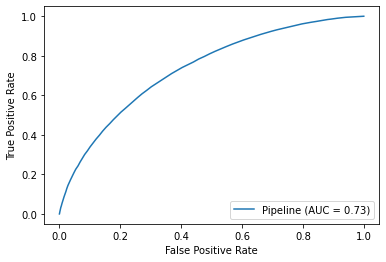

In [61]:
plot_roc_curve(pipe, x_valid, y_valid)

In [59]:
## Current Model Hyperparameters
model = pipe.get_params().get("randomforest")
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
## Now for finding the best hyperparameters for the model we will use the GridSearchCV.
parameters_grid = {
    "randomforest__max_depth" : [3, 5, 8],
    "randomforest__n_estimators" : [100, 125, 150],
}

auc_scorer = make_scorer(roc_auc_score)

In [55]:
grid_obj = GridSearchCV(estimator=pipe, param_grid=parameters_grid,
                        n_jobs=-1, scoring=auc_scorer, verbose=1)
grid_obj

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('onehot_trf',
                                                                         OneHotEncoder(),
                                                                         ['specialization_domain',
                                                                          'learner_country_group',
                                                                          'learner_gender']),
                                                                        ('log_trf',
                                                                         FunctionTransformer(func=<function log_transformer at 0x7f7ef42181f0>),
                                                                         ['learner_cnt_other_courses_active',
                                                                          'learner_cnt_other_courses_paid_active',
                                                                          'learner_cn...
                                                                        ('sqrt_trf',
                                                                         FunctionTransformer(func=<function sqrt_transformer at 0x7f7ef4218040>),
                                                                         ['days_since_last_payment',
                                                                          'days_til_next_payment_due'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('randomforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforest__max_depth': [3, 5, 8],
                         'randomforest__n_estimators': [100, 125, 150]},
             scoring=make_scorer(roc_auc_score), verbose=1)

In [69]:
grid_obj = grid_obj.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.6min finished


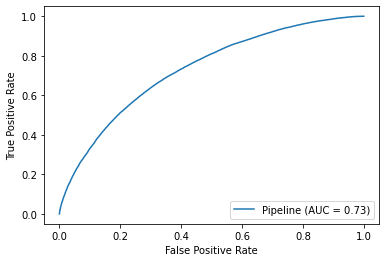

In [72]:
best_estimator = grid_obj.best_estimator_
plot_roc_curve(best_estimator, x_valid, y_valid)

In [73]:
best_estimator.score(x_valid, y_valid)
print(classification_report(y_valid, best_estimator.predict(x_valid)))

              precision    recall  f1-score   support

         0.0       0.66      0.58      0.61     37634
         1.0       0.68      0.75      0.71     45157

    accuracy                           0.67     82791
   macro avg       0.67      0.66      0.66     82791
weighted avg       0.67      0.67      0.67     82791



## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [74]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = best_estimator.predict_proba(test_df[feature_columns])[:, 1]

In [75]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [76]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,0.587668
1,-3jgpo3XEeuquA5bylYGqQ,0.767948
2,-4iSgbBhEeutEwol7kuJnw,0.702421
3,-D1ayv64Eeuw4w5IkZJKbw,0.494505
4,-DJEc-L5Eeub2BLESLBCkw,0.678390
5,-EbzSDdgEeyiog5l139adw,0.653511
6,-GVVgmMxEeuQZgoplpe76w,0.398883
7,-H4Bil5DEeyGdgqSaUkc7Q,0.247972
8,-O-hHcevEeuPIA4yld1PaQ,0.487248
9,-VFHd3C_EeuyDgqvLkrnfQ,0.761386


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [77]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [78]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [79]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [49]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


In [115]:
## Now Choosing Let's Start using DeepLearning I will use tensorflow here
## The use of the DL approach here is just to see if it will be better or not.
## The model will have this archit -> [128, 64, 128, 32, 16, 1]
## with relu activations in the hidden layers and sigmoid in the output.


In [85]:
dl_transformer = Pipeline([
    ("transformers", transformers),
    ("scaler", MinMaxScaler())
])

dl_transformer = dl_transformer.fit(x_train)
x_train_scaled = dl_transformer.transform(x_train)
x_valid_scaled = dl_transformer.transform(x_valid)

In [94]:

input_shape = x_train_scaled.shape
LEARNING_RATE = 1e-3

dl_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape[1], ), name="input"),
    tf.keras.layers.Dense(units=256, activation="linear"  , name="fc1"),
    tf.keras.layers.Dense(units=64 , activation=tf.nn.relu, name="fc2"),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu, name="fc3"),
    tf.keras.layers.Dense(units=32 , activation=tf.nn.relu, name="fc4"),
    tf.keras.layers.Dense(units=16 , activation=tf.nn.relu, name="fc5"),
    tf.keras.layers.Dense(units=1  , activation=tf.nn.sigmoid, name="output"),
], name="Sequential_Model_V1")

dl_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)

dl_model.summary()

Model: "Sequential_Model_V1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 256)               14080     
_________________________________________________________________
fc2 (Dense)                  (None, 64)                16448     
_________________________________________________________________
fc3 (Dense)                  (None, 128)               8320      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                4128      
_________________________________________________________________
fc5 (Dense)                  (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
___________________________________________

In [95]:
N_EPOCHS = 30
BATCH_SIZE = 64

dl_model_history = dl_model.fit(
    x_train_scaled, y_train,
    validation_data=(x_valid_scaled, y_valid),
    epochs=N_EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=True
)

Train on 331162 samples, validate on 82791 samples
Epoch 1/30
331162/331162 [==============================] - 8s 25us/sample - loss: 0.6883 - accuracy: 0.5359 - val_loss: 0.6834 - val_accuracy: 0.5517
Epoch 2/30
331162/331162 [==============================] - 8s 25us/sample - loss: 0.6776 - accuracy: 0.5760 - val_loss: 0.6689 - val_accuracy: 0.6021
Epoch 3/30
331162/331162 [==============================] - 8s 24us/sample - loss: 0.6558 - accuracy: 0.6228 - val_loss: 0.6400 - val_accuracy: 0.6409
Epoch 4/30
331162/331162 [==============================] - 8s 23us/sample - loss: 0.6290 - accuracy: 0.6487 - val_loss: 0.6206 - val_accuracy: 0.6557
Epoch 5/30
331162/331162 [==============================] - 8s 24us/sample - loss: 0.6182 - accuracy: 0.6573 - val_loss: 0.6151 - val_accuracy: 0.6603
Epoch 6/30
331162/331162 [==============================] - 8s 24us/sample - loss: 0.6145 - accuracy: 0.6605 - val_loss: 0.6126 - val_accuracy: 0.6610
Epoch 7/30
331162/331162 [=================

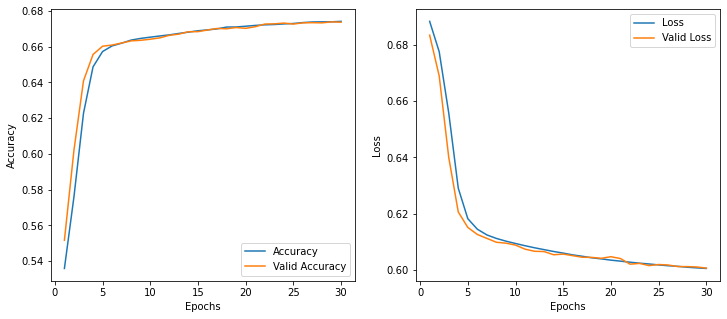

In [98]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

epochs_range = range(1, N_EPOCHS+1)
ax1.plot(epochs_range, dl_model_history.history["accuracy"], label="Accuracy")
ax1.plot(epochs_range, dl_model_history.history["val_accuracy"], label="Valid Accuracy")
ax1.set_xlabel("Epochs"); ax1.set_ylabel("Accuracy")

ax2.plot(epochs_range, dl_model_history.history["loss"], label="Loss")
ax2.plot(epochs_range, dl_model_history.history["val_loss"], label="Valid Loss")
ax2.set_xlabel("Epochs"); ax2.set_ylabel("Loss")

ax1.legend(); ax2.legend()


In [99]:
x_test_scaled = dl_transformer.transform(test_df[feature_columns])

In [102]:
x_test_scaled[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.66906877e-01, 3.33339531e-01, 5.60886688e-03, 1.61990591e-04,
       2.62618276e-04, 1.00074856e-05, 5.73155147e-03, 2.35554418e-02,
       6.52337145e-03, 3.26376591e-03, 1.26089185e-02, 2.04774257e-01,
       3.35410127e-03, 4.95046120e-01, 2.15948117e-01, 4.35002484e-03,
       7.62000762e-01, 5.06041816e-01])

In [103]:
dl_predictions = dl_model.predict_proba(x_test_scaled)
dl_predictions

array([[0.56068856],
       [0.81276584],
       [0.82823175],
       ...,
       [0.23206472],
       [0.86997205],
       [0.36468828]], dtype=float32)

In [105]:
dl_predictions.ravel()

array([0.56068856, 0.81276584, 0.82823175, ..., 0.23206472, 0.86997205,
       0.36468828], dtype=float32)

In [116]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': dl_predictions.ravel()})

In [117]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,0.560689
1,-3jgpo3XEeuquA5bylYGqQ,0.812766
2,-4iSgbBhEeutEwol7kuJnw,0.828232
3,-D1ayv64Eeuw4w5IkZJKbw,0.352159
4,-DJEc-L5Eeub2BLESLBCkw,0.685752
5,-EbzSDdgEeyiog5l139adw,0.725481
6,-GVVgmMxEeuQZgoplpe76w,0.408719
7,-H4Bil5DEeyGdgqSaUkc7Q,0.118344
8,-O-hHcevEeuPIA4yld1PaQ,0.476879
9,-VFHd3C_EeuyDgqvLkrnfQ,0.770775


In [118]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [119]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [120]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [121]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [129]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, dl_model.predict_proba(x_valid_scaled), pos_label=2)

In [130]:
auc(fpr, tpr)

nan

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!